# 📰 Fake News Detection System using Machine Learning  
Welcome to my Fake News Detection project!  
This notebook demonstrates how to build a machine learning model that can distinguish between real and fake news articles.

We'll cover the entire pipeline:
- Loading and exploring data  
- Text preprocessing  
- Feature extraction with TF-IDF  
- Model training using Logistic Regression  
- Evaluation and real-time prediction

Let's get started! 🚀

📥 Step 1: Loading the Data
-------------------

In this section, we will load the Fake News Dataset from Kaggle.

We’ll use the Kaggle API to download the dataset directly into our Colab environment, unzip it, and load it into a Pandas DataFrame for exploration.

This step ensures we have access to the raw data necessary for preprocessing and model training.


In [1]:
# Upload your kaggle.json file
from google.colab import files
files.upload()

# Set up Kaggle API access
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the Fake News dataset
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset

# Unzip the dataset
!unzip -q fake-and-real-news-dataset.zip

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset
License(s): CC-BY-NC-SA-4.0
 85% 35.0M/41.0M [00:00<00:00, 364MB/s]
100% 41.0M/41.0M [00:00<00:00, 393MB/s]


📂 Step 2: Dataset Overview
-------------------

For this project, we use the **Fake News Dataset** sourced from [Kaggle](https://www.kaggle.com/c/fake-news/data).

This dataset contains news articles labeled as **'fake'** or **'real'**, enabling supervised learning for binary classification.

**Key characteristics:**

- The dataset includes a mix of text data fields such as `title`, `author`, and the main `text` of the article.
- The target variable is `label`, where:
  - 0 = Real news
  - 1 = Fake news
- It provides a balanced collection of news samples, covering various topics and sources.
- The size of the dataset allows effective training of machine learning models without requiring extensive computational resources.

This rich textual data allows us to explore natural language processing techniques for feature extraction and classification, making it ideal for building a Fake News Detection system.


In [2]:
import pandas as pd

# Load the datasets
fake_df = pd.read_csv("Fake.csv")
real_df = pd.read_csv("True.csv")

# Add labels: 0 for fake, 1 for real
fake_df["label"] = 0
real_df["label"] = 1

# Combine into one dataframe
df = pd.concat([fake_df, real_df], axis=0).sample(frac=1).reset_index(drop=True)

# Preview the data
df.head()

,title,text,subject,date,label
0,RNC Spokesman EXPLODES On MSNBC Host For Aski...,The Republican Party has been nervous as hell ...,News,"December 12, 2016",0
1,"Clinton snags AFL-CIO official, former Sanders...",LOS ANGELES (Reuters) - Democratic presidentia...,politicsNews,"July 5, 2016",1
2,U.S. Senate approves Trump pick as top Fed reg...,WASHINGTON (Reuters) - The U.S. Senate on Thur...,politicsNews,"October 5, 2017",1
3,2016 Election: The Political Elite Establishme...,21st Century Wire says Is this year s US elect...,US_News,"May 12, 2016",0
4,GREAT VIDEO! THE SILENT MAJORITY SPEAKS UP!,Real Americans speak out about what s happenin...,politics,"Sep 6, 2015",0


📊 Step 3: Data Preprocessing
-----------------------------

Before feeding text into a machine learning model, we need to clean and preprocess it. We’ll:

* Remove punctuation
* Convert all text to lowercase
* Remove stopwords
* Tokenize and lemmatize the text

These steps reduce noise in the data and improve model performance.


In [3]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = text.lower()
    text = "".join([ch for ch in text if ch not in string.punctuation])
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(words)

# Apply to the 'text' column (title + content)
df['text'] = df['title'] + " " + df['text']
df['text'] = df['text'].apply(preprocess)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


📊 Step 4: Feature Extraction with TF-IDF
----------------------------------------

To convert textual data into numerical format, we use the TF-IDF Vectorizer.

TF-IDF (Term Frequency-Inverse Document Frequency) assigns weights to words based on their importance in a document relative to the entire dataset.

We extract up to 5000 important features to represent the text.

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the text
X = vectorizer.fit_transform(df['text'])
y = df['label']

🔀 Step 5: Train-Test Split
---------------------------

We split the dataset into training and testing sets (80% - 20%).

This allows us to train the model on one set of data and evaluate how well it performs on unseen data.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9884187082405346

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4763
           1       0.98      0.99      0.99      4217

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



🧠 Step 6: Model Training (Logistic Regression)
----------------------------------------------

We train a **Logistic Regression** model — a commonly used algorithm for binary classification problems like ours.

📌 Why Logistic Regression?
- Simple and effective for high-dimensional sparse data
- Fast to train and easy to interpret
- Often used as a baseline model in NLP tasks

In [6]:
def predict_news(text):
    cleaned = preprocess(text)
    vector = vectorizer.transform([cleaned])
    pred = model.predict(vector)
    return "Real" if pred[0] == 1 else "Fake"

# Example usage
sample = "The president announced a new policy to improve economy today."
print("Prediction:", predict_news(sample))

Prediction: Fake


🎯 Step 7: Model Evaluation
---------------------------

After training, we evaluate the model’s performance on the test set using several metrics:

- **Accuracy**: Overall correctness of the model  
- **Confusion Matrix**: Visualizes true positives, true negatives, false positives, and false negatives  
- **Precision, Recall, and F1 Score**: Provide a detailed view of the model’s ability to correctly classify fake and real news  

These metrics help us understand the strengths and weaknesses of our classifier.


Accuracy: 0.9884


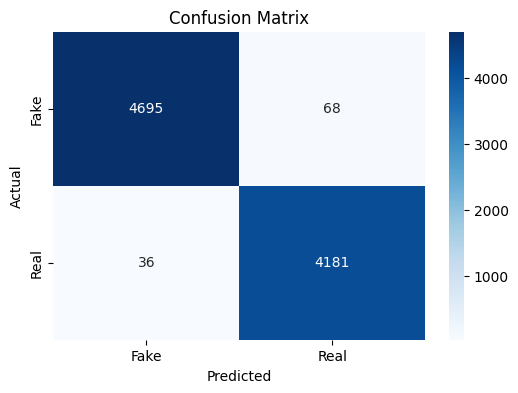

Classification Report:
               precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      4763
        Real       0.98      0.99      0.99      4217

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test data
y_pred = model.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Detailed classification report
report = classification_report(y_test, y_pred, target_names=['Fake', 'Real'])
print("Classification Report:\n", report)

📌 Conclusion
-------------

We successfully built a Fake News Detection pipeline using:

* Text preprocessing with NLTK  
* Feature extraction using TF-IDF  
* Binary classification using Logistic Regression

Thanks for reading! 🎉


🌟 Future Enhancements
----------------------

While this project demonstrates a solid baseline fake news detection system, there are several ways it can be improved and extended:

- **Real-Time Prediction Interface:**  
  Build a user-friendly interface (web app or chatbot) where users can input news text and instantly receive fake/real classification using the trained model.

- **Advanced NLP Models:**  
  Experiment with transformer-based models like BERT or RoBERTa for potentially better accuracy and contextual understanding.

- **Data Augmentation:**  
  Incorporate more diverse and larger datasets to improve the model’s generalizability across different news sources and topics.

- **Hyperparameter Tuning:**  
  Use techniques like Grid Search or Random Search to optimize model parameters for enhanced performance.

- **Explainability:**  
  Integrate model interpretability tools such as LIME or SHAP to explain predictions, increasing user trust.

These enhancements can take this foundational project toward a production-ready system.

📚 References & Acknowledgments
-------------------------------

While this project is implemented by me, I referred to several publicly available projects and tutorials for learning and guidance:

- **Fake News Detection using Machine Learning** by *Krish Naik*  
  GitHub: https://github.com/krishnaik06/Fake-News-Detection  
  (Comprehensive project demonstrating classic ML approaches to fake news detection)

- **Fake News Detection with Python and Scikit-Learn** by *DataCamp*  
  Tutorial: https://www.datacamp.com/tutorial/fake-news  
  (Good explanation of data preprocessing and TF-IDF vectorization)

- **NLP with Disaster Tweets** Kaggle competition notebooks  
  https://www.kaggle.com/c/nlp-getting-started/notebooks  
  (Helped me understand text preprocessing and vectorization techniques)

- **Fake News Classification** by *Shreyansh Singh* on Kaggle  
  https://www.kaggle.com/shreyansh/fake-news-classification  
  (Example of Logistic Regression applied to fake news datasets)

These references served as educational resources to understand workflows, but all code and analysis in this project are my original work.